In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StressLevelDataset.csv')

In [4]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [6]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1


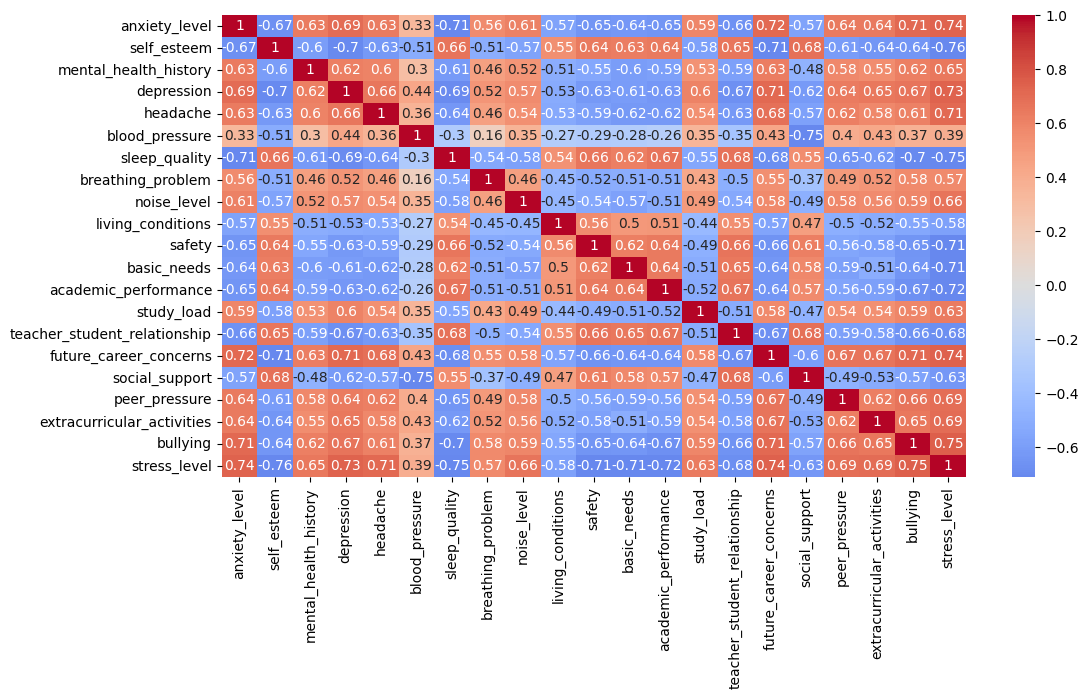

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(
    correlation_matrix,
    annot = True,
    center = 0,
    cmap = 'coolwarm',
    fmt = '.2g',
    robust = True
)
plt.show()

In [9]:
x = df.drop(['stress_level'], axis=1)
y = df['stress_level']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [10]:
logistic = LogisticRegression(
    class_weight = 'balanced',
    C = 0.01,
    penalty = 'l1',
    solver = 'saga'
)
logistic.fit(x_train_sc, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [11]:
knn = KNeighborsClassifier(
    leaf_size = 15,
    n_neighbors = 5,
    weights = 'uniform',
    metric = 'manhattan'
)
knn.fit(x_train_sc, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,15
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [12]:
tree = DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 2,
    max_features = 'log2',
    max_leaf_nodes = 10,
    min_impurity_decrease = 0.01,
    min_samples_leaf = 1,
    min_samples_split = 10,
    splitter = 'best'
)
tree.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,10
,min_impurity_decrease,0.01
,class_weight,None


In [13]:
log_train = logistic.predict(x_train_sc)
acc = accuracy_score(y_train, log_train)
print("Training Accuracy of logistic : ", acc)

knn_train = knn.predict(x_train_sc)
acc = accuracy_score(y_train, knn_train)
print("Training Accuracy of KNN : ", acc)

tree_train = tree.predict(x_train)
acc = accuracy_score(y_train, tree_train)
print("Training Accuracy of tree : ", acc)

Training Accuracy of logistic :  0.8795454545454545
Training Accuracy of KNN :  0.9113636363636364
Training Accuracy of tree :  0.8852272727272728


  File "c:\Users\scien\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\scien\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\scien\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\scien\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [14]:
log_test = logistic.predict(x_test_sc)
acc = accuracy_score(y_test, log_test)
print("Testing Acccuracy of logistic : ", acc)

knn_test = knn.predict(x_test_sc)
acc = accuracy_score(y_test, knn_test)
print("Testing Accuracy of KNN : ", acc)

tree_test = tree.predict(x_test)
acc = accuracy_score(y_test, tree_test)
print("Testing Accuracy of tree : ", acc)

Testing Acccuracy of logistic :  0.8772727272727273
Testing Accuracy of KNN :  0.8954545454545455
Testing Accuracy of tree :  0.8590909090909091


In [15]:
log_params = {
    'C' : [0.01, 0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter = 1000), log_params, cv = 5)
grid.fit(x,y)

print("Best parameters :", grid.best_params_)
print("Best score : ", grid.best_score_)

Best parameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best score :  0.889090909090909


In [16]:
knn_params = {
    'n_neighbors' : [5, 10, 15, 20],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowsi'],
    'leaf_size' : [15, 20]
}

knn_grid = GridSearchCV (KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(x,y)

print("Best parameters : ", knn_grid.best_params_)
print("Best score : ", knn_grid.best_score_)

Best parameters :  {'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score :  0.8845454545454545


In [17]:
tree_params = {
    'max_depth' : [2, 5, 10, 20],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes' : [None, 10, 20, 30],
    'min_impurity_decrease' : [0.0, 0.01, 0.1]
 }

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
tree_grid.fit(x,y)

print("Best parameters : ", tree_grid.best_params_)
print("Best score : ", tree_grid.best_score_)

Best parameters :  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score :  0.9


In [18]:
print("logistic classification report\n", classification_report(y_test, log_test))
print("knn classification report\n", classification_report(y_test, knn_test))
print("tree classification report\n", classification_report(y_test, tree_test))

logistic classification report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       1.00      0.84      0.91        73
           2       0.80      0.93      0.86        71

    accuracy                           0.88       220
   macro avg       0.89      0.88      0.88       220
weighted avg       0.89      0.88      0.88       220

knn classification report
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       0.90      0.90      0.90        73
           2       0.86      0.92      0.88        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

tree classification report
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        76
           1       0.80      0.90      0.8

In [19]:
print("logistic confusion matrix\n", confusion_matrix(y_test, log_test))
print("knn confusion matrix\n", confusion_matrix(y_test, knn_test))
print("tree confusion matrix\n", confusion_matrix(y_test, tree_test))

logistic confusion matrix
 [[66  0 10]
 [ 5 61  7]
 [ 5  0 66]]
knn confusion matrix
 [[66  3  7]
 [ 3 66  4]
 [ 2  4 65]]
tree confusion matrix
 [[65  7  4]
 [ 2 66  5]
 [ 3 10 58]]


In [20]:
log_cv = cross_val_score(logistic, x, y, cv=5)

print("cross val score of logistic : ", log_cv)
print("cross val score of logisic : ", log_cv.mean())
print("cross val score of logistic : ", log_cv.std())

cross val score of logistic :  [0.9        0.89090909 0.86818182 0.90454545 0.89090909]
cross val score of logisic :  0.8909090909090909
cross val score of logistic :  0.012530953410991119


In [21]:
knn_cv = cross_val_score(knn, x, y, cv=5)

print("cross val score of knn : ", knn_cv)
print("cross val score of knn : ", knn_cv.mean())
print("cross val score of knn : ", knn_cv.std())

cross val score of knn :  [0.9        0.90909091 0.87272727 0.85       0.88636364]
cross val score of knn :  0.8836363636363636
cross val score of knn :  0.020849718074872216


In [22]:
tree_cv = cross_val_score(tree, x, y, cv=5)

print("cross val score of tree : ", tree_cv)
print("cross val score of tree : ", tree_cv.mean())
print("cross val score of tree : ", tree_cv.std())

cross val score of tree :  [0.89545455 0.88181818 0.87727273 0.85       0.89090909]
cross val score of tree :  0.8790909090909091
cross val score of tree :  0.01590259607685083
